# Manga ResFlux

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

from astropy.io import fits
from glob import glob
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D, Conv2D, Conv1D, InputLayer, Dropout, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

from Modeling import CrossValidationModeler

Using TensorFlow backend.


---
## Multiline Dataset Model

In [53]:
manga = h5py.File('../../Data/manga_flux_multiline+.hdf5')
Y = np.array(manga['flux_labels'])
res_flux = np.array(manga['res_flux_values'])
#ivar = np.array(manga['ivar_flux_values'])
#ivar_rescaled = np.array(manga['ivar_rescaled_flux_values'])

res_flux = np.expand_dims(res_flux, -1)
#ivar = np.expand_dims(ivar, -1)
#X = np.expand_dims(X, -1)
#ivar_rescaled = np.expand_dims(ivar_rescaled, -1)
manga.close()

In [33]:
res_flux.shape, Y.shape

((17732, 4563, 1), (17732, 1))

# Models

In [51]:
# def create_conv_flux_model():
#     model = Sequential()
#     model.add(InputLayer(batch_input_shape=(None, 4563, 1)))
#     model.add(Conv1D(filters=64, kernel_size=2))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Conv1D(filters=24, kernel_size=2))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     #model.add(MaxPooling1D())
#     model.add(Flatten())
#     model.add(Dense(1024))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(.5))
#     model.add(Dense(512))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
#     return model

# def create_simple():
#     model = Sequential()
#     model.add(InputLayer(batch_input_shape=(None, 4563, 1)))
#     model.add(Conv1D(filters=64, kernel_size=2))

# def create_complex():
#     model = Sequential()
#     model.add(InputLayer(batch_input_shape=(None, 4563, 1)))
    
#     model.add(Conv1D(filters=64, kernel_size=10))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
    
#     model.add(Conv1D(filters=32, kernel_size=10))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
    
#     model.add(MaxPooling1D())
    
#     model.add(Conv1D(filters=12, kernel_size=2))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
    
#     model.add(Conv1D(filters=6, kernel_size=2))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
    
#     model.add(MaxPooling1D())
    
#     model.add(Flatten())
    
#     model.add(Dense(1024))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(.75))
    
    
#     model.add(Dense(1024))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(.75))
    
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
#     return model


def create_conv_flux_model():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None,4563, 1)))
    model.add(Conv1D(filters=64, kernel_size=2,activation= 'relu'))
    model.add(Conv1D(filters=24, kernel_size=2,activation= 'relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=.00001), metrics=['accuracy'])
    return model

def create_conv_flux_model_exp():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None, 1, 4639, 2)))
    model.add(Conv2D(filters=64, kernel_size=(1,2), activation='relu', data_format='channels_last'))
    #model.add(BatchNormalization())
    #model.add(MaxPooling2D((1,2)))
    model.add(Conv2D(filters=24, kernel_size=(1,2), activation='relu', data_format='channels_last'))
    #model.add(BatchNormalization())
    #model.add(MaxPooling2D((1,2)))
    model.add(Flatten())
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(.00001), metrics=['accuracy'])
    return model


def create_complex():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None, 4563, 1)))
    
    model.add(Conv1D(filters=64, kernel_size=10))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv1D(filters=32, kernel_size=10))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling1D())
    
    model.add(Conv1D(filters=12, kernel_size=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv1D(filters=6, kernel_size=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling1D())
    
    model.add(Flatten())
    
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(.50))
    
    
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(.50))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    return model

# Initial Testing

In [54]:
mod = create_complex()
mod.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Train on 13299 samples, validate on 4433 samples
Epoch 1/10
13299/13299 [==============================] - 14s 1ms/step - loss: 0.5280 - acc: 0.7777 - val_loss: 0.4929 - val_acc: 0.8008
Epoch 2/10
13299/13299 [==============================] - 6s 462us/step - loss: 0.4590 - acc: 0.8019 - val_loss: 0.4633 - val_acc: 0.8128
Epoch 3/10
13299/13299 [==============================] - 6s 462us/step - loss: 0.3974 - acc: 0.8218 - val_loss: 0.4505 - val_acc: 0.8107
Epoch 4/10
13299/13299 [==============================] - 6s 464us/step - loss: 0.3377 - acc: 0.8528 - val_loss: 0.4945 - val_acc: 0.7564
Epoch 5/10
13299/13299 [==============================] - 6s 464us/step - loss: 0.2749 - acc: 0.8819 - val_loss: 0.5362 - val_acc: 0.7171
Epoch 6/10
13299/13299 [==============================] - 6s 466us/step - loss: 0.2008 - acc: 0.9172 - val_loss: 0.8680 - val_acc: 0.5231
Epoch 7/10
 6912/13299 [==============>...............] - ETA: 2s - loss: 0.1403 - acc: 0.9479

KeyboardInterrupt: 

In [36]:
import random
seed = random.randint(0,100)
X_train, X_test, y_train, y_test = train_test_split(res_flux, Y, random_state=80)
seed

75

In [24]:
X_train, X_test, y_train, y_test = train_test_split(res_flux, Y, random_state=61)

In [ ]:
Keras_eboss_NN_Model = KerasClassifier(create_conv_flux_model, epochs=10, batch_size=256, verbose=0)
cvm_nn_flux = CrossValidationModeler(res_flux, Y, Keras_eboss_NN_Model)

In [16]:
cvm_nn_flux.run_cross_val({}, n_splits=1)

,mean_test_precision (no),mean_test_precision (yes),mean_test_recall (no),mean_test_recall (yes),mean_test_accuracy,mean_test_roc_auc,mean_test_f1
Parameters,,,,,,,
{},0.907801,0.888514,0.795031,0.952899,0.894737,0.873965,0.91958


## Running 50  Folds on Multiline data.

In [28]:
Keras_manga_multiline_NN_Model = KerasClassifier(create_conv_flux_model, epochs=10, batch_size=256, verbose=0)
cvm_manga_nn_flux = CrossValidationModeler(res_flux, Y, Keras_manga_multiline_NN_Model)
cvm_manga_nn_flux.run_cross_val({}, n_splits=50)

Fitting 50 folds for each of 1 candidates, totalling 50 fits
[CV]  ................................................................
[CV]  , precision (no)=0.9241379310344827, precision (yes)=0.9178082191780822, recall (no)=0.8481012658227848, recall (yes)=0.9605734767025089, accuracy=0.919908466819222, roc_auc=0.9043373712626468, f1=0.9387040280210158, total=   5.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  , precision (no)=0.8258064516129032, precision (yes)=0.9184397163120568, recall (no)=0.847682119205298, recall (yes)=0.9055944055944056, accuracy=0.88558352402746, roc_auc=0.8766382623998519, f1=0.9119718309859155, total=   6.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


[CV]  , precision (no)=0.9105691056910569, precision (yes)=0.8853503184713376, recall (no)=0.7567567567567568, recall (yes)=0.9619377162629758, accuracy=0.8924485125858124, roc_auc=0.8593472365098663, f1=0.9220563847429519, total=   5.6s
[CV]  ................................................................
[CV]  , precision (no)=0.9090909090909091, precision (yes)=0.9183673469387755, recall (no)=0.8441558441558441, recall (yes)=0.9540636042402827, accuracy=0.9153318077803204, roc_auc=0.8991097241980633, f1=0.9358752166377816, total=   5.8s
[CV]  ................................................................
[CV]  , precision (no)=0.948905109489051, precision (yes)=0.9166666666666666, recall (no)=0.8387096774193549, recall (yes)=0.975177304964539, accuracy=0.9267734553775744, roc_auc=0.906943491191947, f1=0.9450171821305843, total=   5.8s
[CV]  ................................................................
[CV]  , precision (no)=0.9246575342465754, precision (yes)=0.914089347079037

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished


,mean_test_precision (no),mean_test_precision (yes),mean_test_recall (no),mean_test_recall (yes),mean_test_accuracy,mean_test_roc_auc,mean_test_f1
Parameters,,,,,,,
{},0.902032,0.916278,0.843217,0.948678,0.910938,0.895947,0.931937


## Generating cross val graphs

In [ ]:
pd.DataFrame(cvm_manga_nn_flux.last_results).to_csv("simple_model_manga.csv")
manga_simple_results = pd.read_csv('simple_model_manga.csv').to_dict()
manga_accuracy_list = list(map(lambda x: x[1][0], filter(lambda x: 'accuracy' in x[0] and 'split' in x[0] , manga_simple_results.items())))

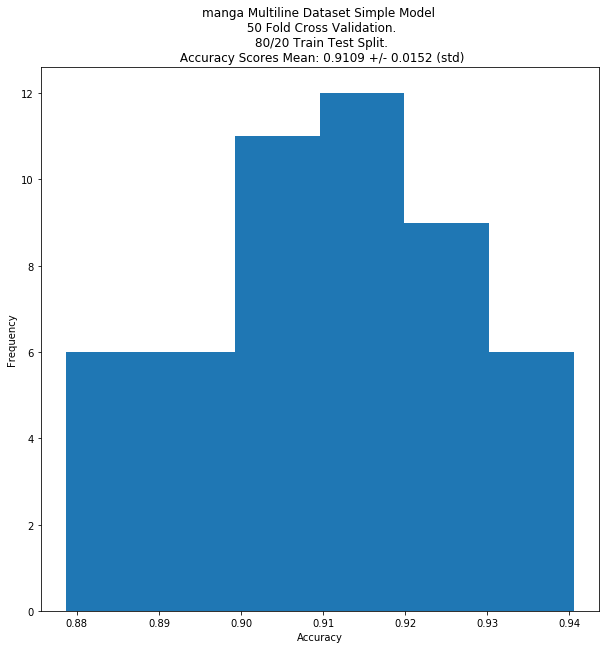

In [30]:
plt.figure(figsize=(10,10))
plt.title(f'manga Multiline Dataset Simple Model \n 50 Fold Cross Validation.\n 80/20 Train Test Split.\n Accuracy Scores Mean: {np.mean(manga_accuracy_list):0.4f} +/- {np.std(manga_accuracy_list):0.4f} (std)')
hist_values = plt.hist(manga_accuracy_list, bins=6)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.savefig('mangaMultiline50CrossValSimpleModel.png')
plt.show()

# Experimenting with ivar

In [ ]:
plt.plot(range(len(mod_X[0][0])), mod_X[0][0][:,0]) 
plt.plot(range(len(mod_X[0][0])), mod_X[0][0][:,1]) 

In [23]:
def create_simple_exp():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None, 1, 4563, 2)))
    model.add(Conv2D(filters=64, kernel_size=(1,2)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters=24, kernel_size=(1,2)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(.75))
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(.75))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(.0001), metrics=['accuracy'])
    return model
    

def create_conv_flux_model_exp():
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(None, 1, 4563, 2)))
    model.add(Conv2D(filters=64, kernel_size=(1,3), activation='relu', data_format='channels_last'))
    model.add(Conv2D(filters=24, kernel_size=(1,3), activation='relu', data_format='channels_last'))
    model.add(MaxPooling2D((1,3)))
    model.add(Flatten())
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
mod_X = np.dstack((res_flux, ivar))
mod_X = np.expand_dims(mod_X, 1)
X_train, X_test, y_train, y_test = train_test_split(mod_X, Y)

In [25]:
mod = create_simple_exp()
hist = mod.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Train on 1638 samples, validate on 546 samples
Epoch 1/20
1638/1638 [==============================] - 7s 4ms/step - loss: 0.5794 - acc: 0.7705 - val_loss: 0.3556 - val_acc: 0.8901
Epoch 2/20
1638/1638 [==============================] - 5s 3ms/step - loss: 0.4863 - acc: 0.8272 - val_loss: 0.3209 - val_acc: 0.8938
Epoch 3/20
1638/1638 [==============================] - 5s 3ms/step - loss: 0.4099 - acc: 0.8394 - val_loss: 0.3026 - val_acc: 0.8938
Epoch 4/20
1638/1638 [==============================] - 5s 3ms/step - loss: 0.3827 - acc: 0.8651 - val_loss: 0.3102 - val_acc: 0.9029
Epoch 5/20
1638/1638 [==============================] - 5s 3ms/step - loss: 0.3529 - acc: 0.8773 - val_loss: 0.2900 - val_acc: 0.9029
Epoch 6/20
1638/1638 [==============================] - 5s 3ms/step - loss: 0.3199 - acc: 0.8791 - val_loss: 0.2836 - val_acc: 0.8993
Epoch 7/20
1638/1638 [==============================] - 5s 3ms/step - loss: 0.2766 - acc: 0.8864 - val_loss: 0.2762 - val_acc: 0.9066
Epoch 8/20
1638

KeyboardInterrupt: 